In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
linear_train_df = pd.read_csv('combined_data\linear_train_data.csv')
linear_val_df = pd.read_csv('combined_data\linear_val_data.csv')
linear_test_df = pd.read_csv('combined_data\linear_test_data.csv')
non_linear_train_df = pd.read_csv('combined_data\\non_linear_train_data.csv')
non_linear_val_df = pd.read_csv('combined_data\\non_linear_val_data.csv')
non_linear_test_df = pd.read_csv('combined_data\\non_linear_test_data.csv')
overlapping_train_df = pd.read_csv('combined_data\overlapping_train_data.csv')
overlapping_val_df = pd.read_csv('combined_data\overlapping_val_data.csv')
overlapping_test_df = pd.read_csv('combined_data\overlapping_test_data.csv')

In [15]:

def knn_1nn_classification(train_data, train_labels, validation_data, validation_labels, test_data, test_labels):

    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(train_data, train_labels)
    
    validation_predicted_labels = classifier.predict(validation_data)
    validation_accuracy = accuracy_score(validation_labels, validation_predicted_labels)
    
    test_predicted_labels = classifier.predict(test_data)
    test_accuracy = accuracy_score(test_labels, test_predicted_labels)
    
    return test_predicted_labels, validation_accuracy, test_accuracy

In [16]:
# For linearly separable data
linear_train_data = linear_train_df[['X', 'Y']]
linear_train_labels = linear_train_df['Label']

linear_val_data = linear_val_df[['X', 'Y']]
linear_val_labels = linear_val_df['Label']

linear_test_data = linear_test_df[['X', 'Y']]
linear_test_labels = linear_test_df['Label']

linear_predicted_labels, linear_val_accuracy, linear_test_accuracy = knn_1nn_classification(linear_train_data, linear_train_labels, 
                                                                  linear_val_data, linear_val_labels,
                                                                  linear_test_data, linear_test_labels)


print("Linearly Separable Validation Data Accuracy:", linear_val_accuracy)
print("Linearly Separable Test Data Accuracy:", linear_test_accuracy)

Linearly Separable Validation Data Accuracy: 1.0
Linearly Separable Test Data Accuracy: 1.0


In [17]:
# For non linearly separable data
non_linear_train_data = non_linear_train_df[['X', 'Y']]
non_linear_train_labels = non_linear_train_df['Label']

non_linear_val_data = non_linear_val_df[['X', 'Y']]
non_linear_val_labels = non_linear_val_df['Label']

non_linear_test_data = non_linear_test_df[['X', 'Y']]
non_linear_test_labels = non_linear_test_df['Label']

non_linear_predicted_labels, non_linear_val_accuracy, non_linear_test_accuracy = knn_1nn_classification(non_linear_train_data, non_linear_train_labels,
                                                                                                        non_linear_val_data, non_linear_val_labels, 
                                                                                                        non_linear_test_data, non_linear_test_labels)

print("Non Linearly Separable Validation Data Accuracy:", non_linear_val_accuracy)
print("Non Linearly Separable Test Data Accuracy:", non_linear_test_accuracy)

Non Linearly Separable Validation Data Accuracy: 1.0
Non Linearly Separable Test Data Accuracy: 1.0


In [18]:
# For overlapping data
overlapping_train_data = overlapping_train_df[['X', 'Y']]
overlapping_train_labels = overlapping_train_df['Label']

overlapping_val_data = overlapping_val_df[['X', 'Y']]
overlapping_val_labels = overlapping_val_df['Label']

overlapping_test_data = overlapping_test_df[['X', 'Y']]
overlapping_test_labels = overlapping_test_df['Label']

overlapping_predicted_labels, overlapping_val_accuracy, overlapping_test_accuracy = knn_1nn_classification(overlapping_train_data, overlapping_train_labels,
                                                                                                           overlapping_val_data, overlapping_val_labels, 
                                                                                                            overlapping_test_data, overlapping_test_labels)
print("Overlapping Validatio Data Accuracy:", overlapping_val_accuracy)
print("Overlapping Test Data Accuracy:", overlapping_test_accuracy)

Overlapping Validatio Data Accuracy: 0.8955555555555555
Overlapping Test Data Accuracy: 0.85


In [22]:
linear_confusion_matrix = confusion_matrix(linear_test_labels, linear_predicted_labels)
non_linear_confusion_matrix = confusion_matrix(non_linear_test_labels, non_linear_predicted_labels)
overlapping_confusion_matrix = confusion_matrix(overlapping_test_labels, overlapping_predicted_labels)

In [45]:
linear_confusion_matrix_percentage = linear_confusion_matrix.astype('float') / linear_confusion_matrix.sum(axis=1)[:, np.newaxis] * 100
non_linear_confusion_matrix_percentage = non_linear_confusion_matrix.astype('float') / non_linear_confusion_matrix.sum(axis=1)[:, np.newaxis] * 100
overlapping_confusion_matrix_percentage = overlapping_confusion_matrix.astype('float') / overlapping_confusion_matrix.sum(axis=1)[:, np.newaxis] * 100

In [83]:
def plot_heatmaps(heatmaps, titles, x_labels, y_labels, cmaps = ['Blues', 'Greens', 'Reds']):
    """
    Plot a list of heatmaps in a side-by-side layout.

    Args:
        heatmaps (list of 2D arrays): List of confusion matrices or heatmaps.
        titles (list of str): Titles for each heatmap.
        x_labels (list of str): X-axis labels for each heatmap.
        y_labels (list of str): Y-axis labels for each heatmap.
        cmaps (list of str): Colour maps for each heatmap.

    """
    num_heatmaps = len(heatmaps)
    num_rows = 1
    num_cols = num_heatmaps

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 6))

    if num_heatmaps == 1:
        axes = [axes]

    # Loop through each heatmap and plot it
    for i in range(num_heatmaps):
        ax = axes[i]
        if(i == 1):
            x_, y_ = x_labels[:-1], y_labels[:-1]
        else:
            x_, y_ = x_labels, y_labels
            
        sns.heatmap(np.transpose(heatmaps[i])/100, annot=True, 
                    cmap=cmaps[i], fmt=".2%", 
                    annot_kws={"size": 16}, square=True,
                    xticklabels=x_, yticklabels=y_, ax=ax)
        ax.set_title(titles[i])
        ax.set_xlabel('Actual Labels')
        ax.set_ylabel('Predicted Labels')

    plt.tight_layout()
    plt.show()

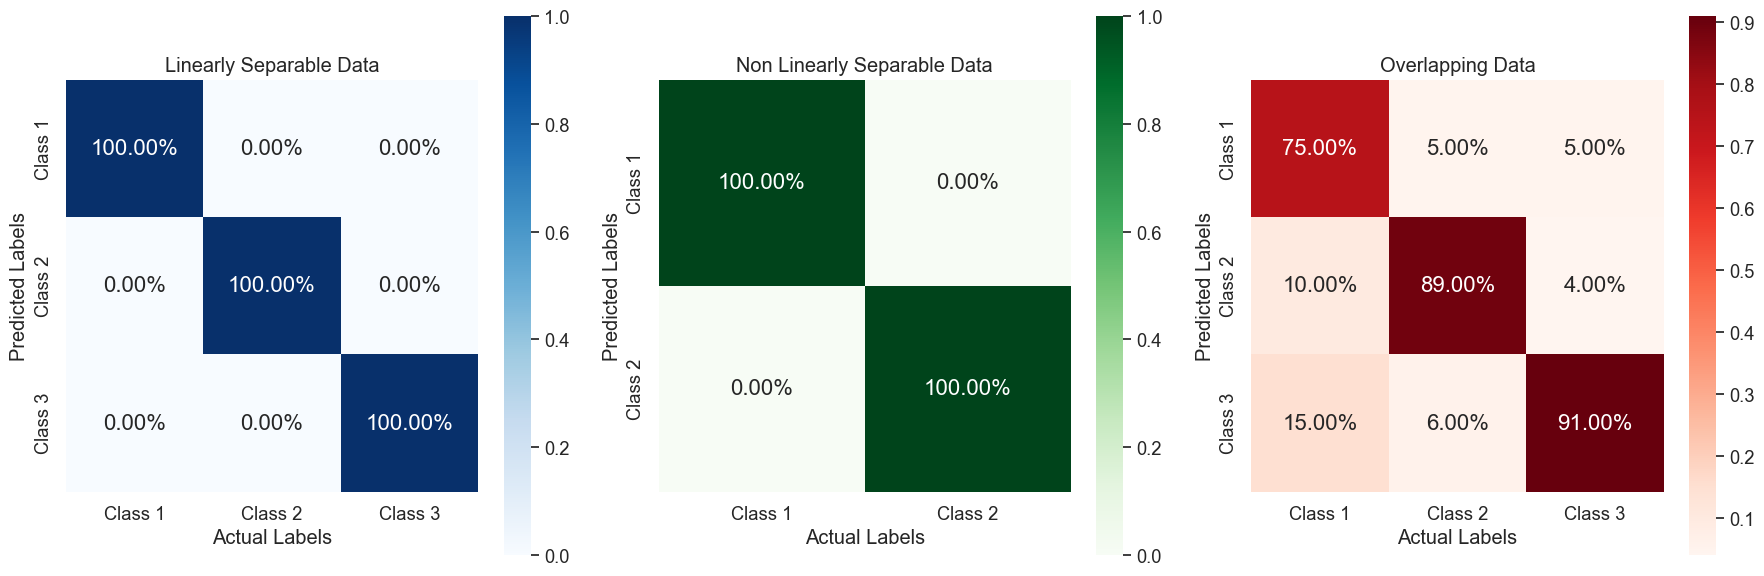

In [84]:
matrices = [linear_confusion_matrix_percentage , non_linear_confusion_matrix_percentage, overlapping_confusion_matrix_percentage]
titles = ['Linearly Separable Data', 'Non Linearly Separable Data', 'Overlapping Data']
x_labels = ['Class 1', 'Class 2', 'Class 3']
y_labels = ['Class 1', 'Class 2', 'Class 3']
cmaps = ['Blues', 'Greens', 'Reds']
plot_heatmaps(matrices, titles, x_labels, y_labels, cmaps)

## Working Pending Henceforth ##

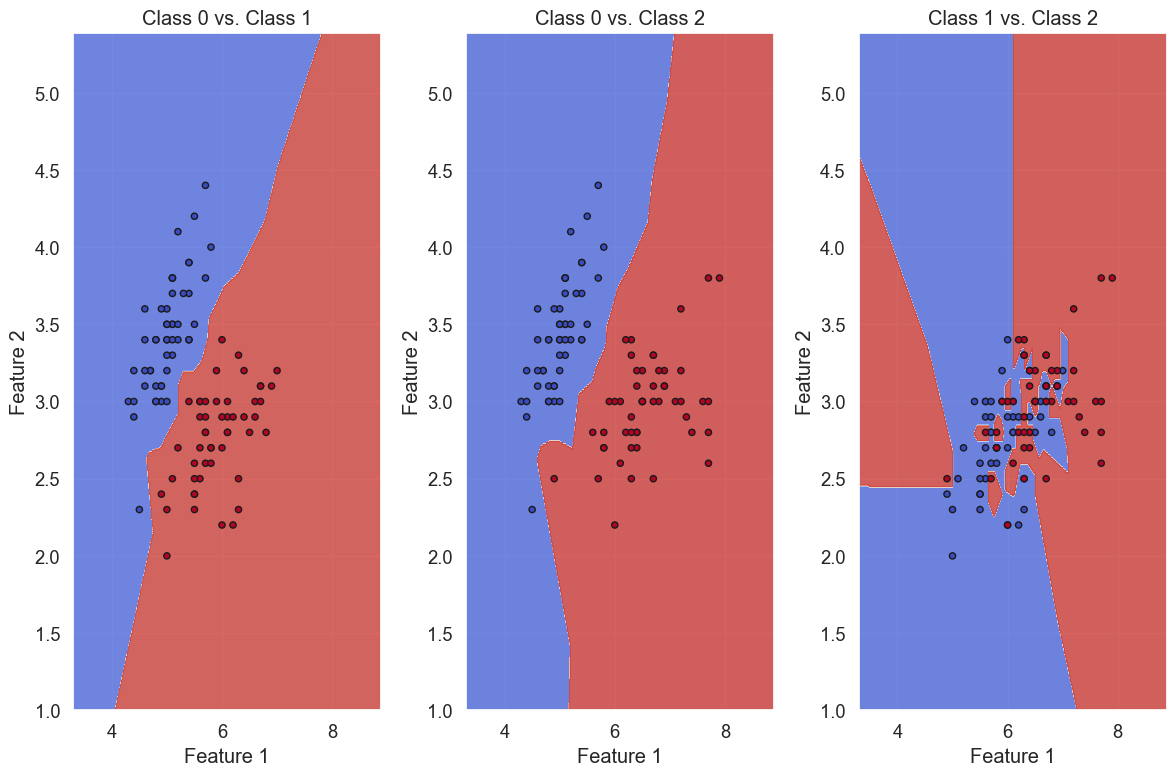

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations

# Load the Iris dataset (or your own dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Create subplots for decision region plots
class_pairs = list(combinations(np.unique(y), 2))
num_plots = len(class_pairs)

plt.figure(figsize=(12, 8))
for i, (class1, class2) in enumerate(class_pairs, 1):
    plt.subplot(1, num_plots, i)

    # Filter the data for the current pair of classes
    X_pair = X[(y == class1) | (y == class2)]
    y_pair = y[(y == class1) | (y == class2)]

    # Train a k-NN classifier for the current pair of classes
    clf = KNeighborsClassifier(n_neighbors=1)  # 1-NN for simplicity; you can adjust k
    clf.fit(X_pair, y_pair)

    # Make predictions for the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision regions
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training data points
    plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y_pair, cmap=plt.cm.coolwarm, edgecolor='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Class {class1} vs. Class {class2}')

plt.tight_layout()
plt.show()
